In [1]:
%pylab inline
from pygadgetreader import readsnap

Populating the interactive namespace from numpy and matplotlib


In [2]:
import weights

In [3]:
def all_host_particles(xyz, vxyz, pids, pot, mass, N_host_particles):
    """
    Function that return the host and the sat particles
    positions and velocities.

    Parameters:
    -----------
    xyz: snapshot coordinates with shape (n,3)
    vxys: snapshot velocities with shape (n,3)
    pids: particles ids
    Nhost_particles: Number of host particles in the snapshot
    Returns:
    --------
    xyz_mw, vxyz_mw, xyzlmc, vxyz_lmc: coordinates and velocities of
    the host and the sat.

    """
    sort_indexes = np.sort(pids)
    N_cut = sort_indexes[N_host_particles]
    host_ids = np.where(pids<N_cut)[0]
    return xyz[host_ids], vxyz[host_ids], pids[host_ids], pot[host_ids], mass[host_ids]

def energies(snap, rcut=0):
    """
    Paramters:
    ----------

    snap : string
        path and name of the snapshot

    rcut : int
        truncation radii (no trunction by default rcut=0)


    Returns:
    --------
    Distances (rr)
    Kinetic energy (Ekk)
    Potential (MW_pot)
    Ids (MW_ids)
    Mass (MW_mass)
    Pos (MW_pos)
    Vel (MW_vel)

    """

    MW_pos= readsnap(snap, 'pos', 'dm')
    MW_vel= readsnap(snap, 'vel', 'dm')
    MW_mass= readsnap(snap, 'mass', 'dm')
    MW_pot = readsnap(snap, 'pot', 'dm')
    MW_ids = readsnap(snap, 'pid', 'dm')


    # Selecting MW particles
    N_host_particles = 97000
    #MW_pos, MW_vel, MW_ids, MW_pot, MW_mass = all_host_particles(pp, vv, ids, Epp, massarr, N_host_particles)

    assert len(MW_ids)==N_host_particles, 'Error: something went wrong selecting the host particles'

    rr=np.sqrt(MW_pos[:,0]**2+MW_pos[:,1]**2+MW_pos[:,2]**2)


    if rcut>0:
        r_cut = np.where((rr<rcut))[0]

        rr = rr[r_cut]
        MW_pos = MW_pos[r_cut]
        MW_vel = MW_vel[r_cut]
        MW_mass = MW_mass[r_cut]
        MW_pot = MW_pot[r_cut]
        MW_ids = MW_ids[r_cut]

    v2=MW_vel[:,0]**2+MW_vel[:,1]**2+MW_vel[:,2]**2
    Ekk=0.5*v2

    return rr, Ekk, MW_pot, MW_ids, MW_mass, MW_pos, MW_vel

In [4]:
rr, Ek, Ep, Mw_ids, MW_m, MW_p, MW_v = energies('../halos/LMC1_97K_vir_000', rcut=50)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs


In [5]:
dnu2_dpsi2, dpsi, psi, eps_bins, df = weights.weight_triaxial(rr, Ek, Ep, Mw_ids, MW_m[0], 0.1, 100, 1, 'Hernquist', [10])

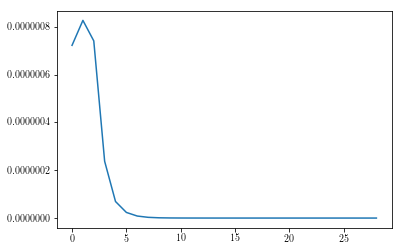

In [6]:
plot(dnu2_dpsi2)

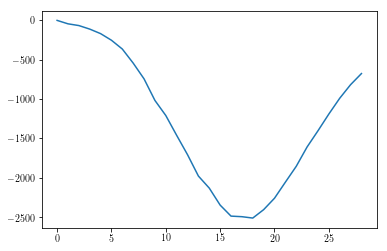

In [7]:
plot(dpsi)

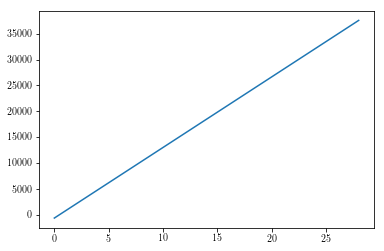

In [8]:
plot(eps_bins)

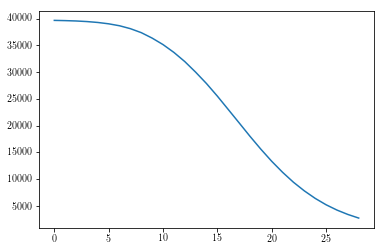

In [9]:
plot(psi)

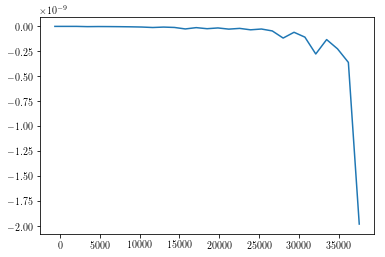

In [10]:
plot(eps_bins, df)

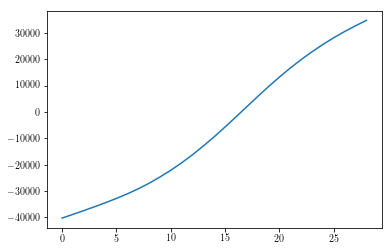

In [26]:
plot(eps_bins-psi)

In [51]:
def eddington(e, dpsi, dnu2_dps2, psi):
    df = np.zeros(len(e))
    for i in range(len(e)):
        if (e[i]-psi[i])<0:
            df[i] = 0
        else:
            df[i] = dpsi[i]/(np.sqrt(e[i]-psi[i])) * dnu2_dpsi2[i]
    return df 

In [57]:
E = eddington(eps_bins, dpsi, dnu2_dpsi2, psi)

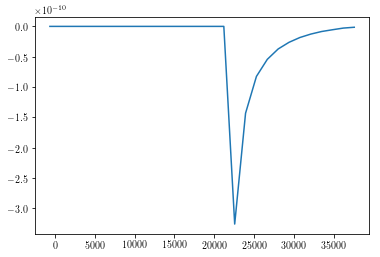

In [58]:
plot(eps_bins,E)

In [62]:
df = np.zeros(len(E))
for i in range(len(E)):
    df[i] = np.sum(E[:i])
    

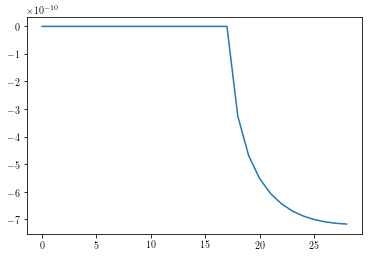

In [64]:
plot(df)

In [18]:
from scipy.interpolate import InterpolatedUnivariateSpline

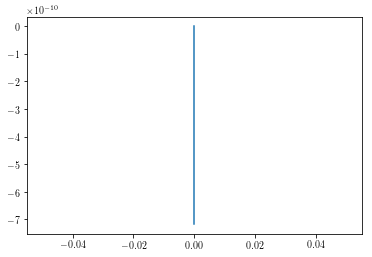

In [55]:
plot(ew,df_b)

In [23]:
df_b

array([  0.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [24]:
E

array([             nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,  -3.26108518e-10,
        -1.43241226e-10,  -8.25307654e-11,  -5.43821936e-11,
        -3.72468547e-11,  -2.62528904e-11,  -1.83333041e-11,
        -1.27059461e-11,  -8.43974477e-12,  -5.52958758e-12,
        -2.78420281e-12,  -1.42751616e-12])